In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_labels.csv
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/641.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/173.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/491.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/718.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/709.png
/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset/Validation/validation_words/379.png
/kaggle/input/doctors-handwrit

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import os


In [6]:
data_dir = '/kaggle/input/doctors-handwritten-prescription-bd-dataset/Doctor’s Handwritten Prescription BD dataset'  # Adjust if needed

# Image parameters
img_height, img_width = 128, 128  # Resize images for consistency

# Data augmentation for training set
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    validation_split=0.2,  # 80-20 train-validation split
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Train set generator
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation set generator
validation_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 3744 images belonging to 3 classes.
Found 936 images belonging to 3 classes.


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
epochs = 15

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
    verbose=1
)


Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 183ms/step - accuracy: 0.6616 - loss: 0.8626 - val_accuracy: 0.6688 - val_loss: 0.8740
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 181ms/step - accuracy: 0.6663 - loss: 0.8386 - val_accuracy: 0.6656 - val_loss: 0.8737
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.6756 - loss: 0.8216 - val_accuracy: 0.6667 - val_loss: 0.8671
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.6713 - loss: 0.8305 - val_accuracy: 0.6656 - val_loss: 0.8707
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.6767 - loss: 0.8174 - val_accuracy: 0.6688 - val_loss: 0.8692
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 180ms/step - accuracy: 0.6621 - loss: 0.8376 - val_accuracy: 0.6635 - val_loss: 0.8745
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 176ms/step - accuracy: 0.6750 - loss: 0.8314 - val_accuracy: 0.6667 - val_loss: 0.8654
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.6667 - loss: 0

30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.6594 - loss: 0.8700
Validation Accuracy: 0.6656


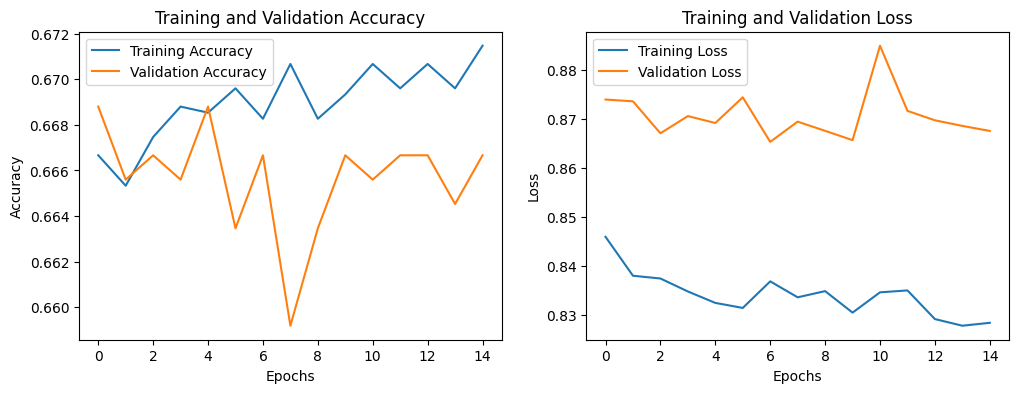

In [10]:
# Get the validation accuracy and loss
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Plotting training and validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


In [11]:
from sklearn.metrics import classification_report

# Prediction on validation set for classification report
val_generator = validation_generator
val_generator.reset()
y_pred = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = val_generator.classes[:len(y_pred_classes)]

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=val_generator.class_indices.keys()))


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step
              precision    recall  f1-score   support

     Testing       0.00      0.00      0.00       156
    Training       0.67      0.99      0.80       624
  Validation       0.00      0.00      0.00       156

    accuracy                           0.66       936
   macro avg       0.22      0.33      0.27       936
weighted avg       0.44      0.66      0.53       936



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
